 출처
```
원본(english) : https://nvie.com/posts/iterators-vs-generators/ 
변역(korea)   : https://mingrammer.com/translation-iterators-vs-generators/ 
```
 

- 컨테이너 (Container)
- 이터레이블 (Iterable)
- 이터레이터 (Iterator)
- 제너레이터 (Generator)
- 제너레이터 표현식 (Generator expression)
- {list, set, dict} 컴프리헨션 ({list, set, dict} comprehension)

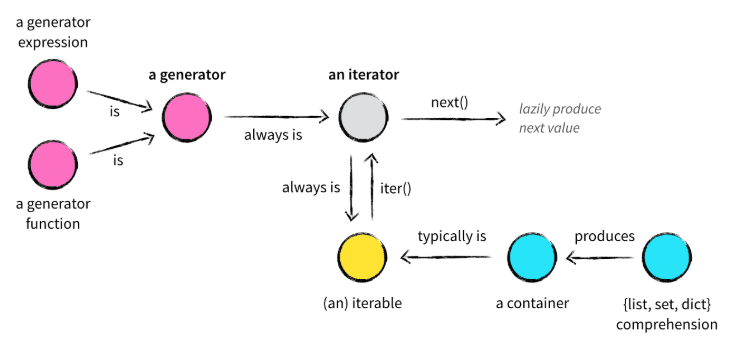

# 컨테이너(Container)


객체를 담을 수 있으면 컨테이너

원소들을 가지고 있는 데이터 구조이며 멤버쉽 테스트를 지원

메모리에 상주하는 데이터 구조로, 모든 원소값을 메모리에 가지고 있다. 

In [2]:
ds = [list, set, tuple, dict, str]

In [4]:
from collections import Container

In [5]:
for d in ds:
    print(issubclass(d, Container))

True
True
True
True
True


In [6]:
class CT:
    def __contains__(self, value):
        return True

In [7]:
issubclass(CT, Container)

True

### 멤버쉽 테스트

In [15]:
assert 1 in [1, 2, 3]     # lists
assert 1 in (1, 2, 3)     # tuples
assert 1 in {1, 2, 3}     # sets

딕셔너리는 키 값을 체크

In [16]:
d = {1: 'foo', 2: 'bar', 3: 'qux'}
assert 1 in d

문자열에는 부분 문자열을 포함하고 있는지 체크

In [19]:
s = 'foobar'
assert 'b' in s
assert 'foo' in s  # 문자열은 부분문자열을 모두 "포함"하고 있다

In [18]:
asset 'ttttt' in s

SyntaxError: invalid syntax (<ipython-input-18-5861c912ffc5>, line 1)

### 컨테이너의 일반적인 특성

#### in (not in)

In [20]:
1 in [1, 2, 3]

True

In [23]:
'a' in {'a': 1, 'b': 2}

True

#### len

In [24]:
len({1, 2, 3, 4})

4

In [25]:
len({'a': 1})

1

#### max, min

In [26]:
max([1, 2, 3, 4])

4

In [27]:
max("한글!@!#123123afsdfsdaf")

'한'

In [28]:
ord('a'), ord('c')

(97, 99)

# Sequence

순서가 있는 Container

In [29]:
from collections import Sequence

In [31]:
ds = [list, set, tuple, dict, str]

for d in ds:
    print(d, issubclass(d, Sequence))

<class 'list'> True
<class 'set'> False
<class 'tuple'> True
<class 'dict'> False
<class 'str'> True


list, tuple, str은 Container 중에서도 Sequencec

### 시퀀스의 일반적인 기능

#### 더하기 연산

In [32]:
[1, 2] + [3, 4]

[1, 2, 3, 4]

In [33]:
'ab' + 'cd'

'abcd'

In [34]:
{'a'} + {'c'}

TypeError: unsupported operand type(s) for +: 'set' and 'set'

#### 곱하기 연산 ( * n)

In [35]:
[1, 2] * 10 # [1, 2] + [1, 2] + ... + [1, 2]

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

#### slice

In [36]:
[1, 2, 3, 4][1:]

[2, 3, 4]

#### 메소드 index

In [37]:
[10, 9, 8, 7].index(9)

1

#### 메소드 count

In [38]:
'aaaaaaaaaaa'.count('a')

11

# 이터레이블(Itrable) 

반복가능한

대부분의 컨테이너는 반복가능하다. = 이터레이블(iteralbe) 하다.

이 말은 객체 내부에 `__iter__` 메소드가 구현되어 있다는 것을 의미합니다.

In [39]:
x = [1,2,3]

In [46]:
x.__iter__

<method-wrapper '__iter__' of list object at 0x0000024C5A899708>

In [40]:
y = iter(x)
z = iter(x)

`__iter__` 메소드를 사용하게 되면 이터레이터를 만들어줍니다.

In [48]:
y.__iter__

<method-wrapper '__iter__' of list_iterator object at 0x0000024C5A8A3BE0>

list object 와 list_iterator 라고 나타나는 것을 확인할 수 있음

In [49]:
print(type(x))
print(type(y))

<class 'list'>
<class 'list_iterator'>


그렇다면 itrable한 객체 x와 itrator y의 차이점은 무엇일까요?

In [55]:
import collections.abc as cols
import pprint

In [57]:
pprint.pprint(cols.Iterable.__dict__)

mappingproxy({'__abstractmethods__': frozenset({'__iter__'}),
              '__doc__': None,
              '__iter__': <function Iterable.__iter__ at 0x0000024C582F4AE8>,
              '__module__': 'collections.abc',
              '__slots__': (),
              '__subclasshook__': <classmethod object at 0x0000024C582F0E10>,
              '_abc_cache': <_weakrefset.WeakSet object at 0x0000024C582F0E80>,
              '_abc_negative_cache': <_weakrefset.WeakSet object at 0x0000024C59230390>,
              '_abc_negative_cache_version': 38,
              '_abc_registry': <_weakrefset.WeakSet object at 0x0000024C582F0E48>})


In [58]:
pprint.pprint(cols.Iterator.__dict__)

mappingproxy({'__abstractmethods__': frozenset({'__next__'}),
              '__doc__': None,
              '__iter__': <function Iterator.__iter__ at 0x0000024C582F4E18>,
              '__module__': 'collections.abc',
              '__next__': <function Iterator.__next__ at 0x0000024C582F4D90>,
              '__slots__': (),
              '__subclasshook__': <classmethod object at 0x0000024C582F0FD0>,
              '_abc_cache': <_weakrefset.WeakSet object at 0x0000024C582F7080>,
              '_abc_negative_cache': <_weakrefset.WeakSet object at 0x0000024C59230518>,
              '_abc_negative_cache_version': 38,
              '_abc_registry': <_weakrefset.WeakSet object at 0x0000024C582F7048>})


In [61]:
able = set(dir(cols.Iterable))
ator = set(dir(cols.Iterator))

print(ator-able)

{'__next__'}


# 이터레이터(iterator)

`__next__`를 가진 모든 객체는 이터레이터이다.

next를 호출할 때 다음값을 생성해내는 상태를 가진 헬퍼 객체

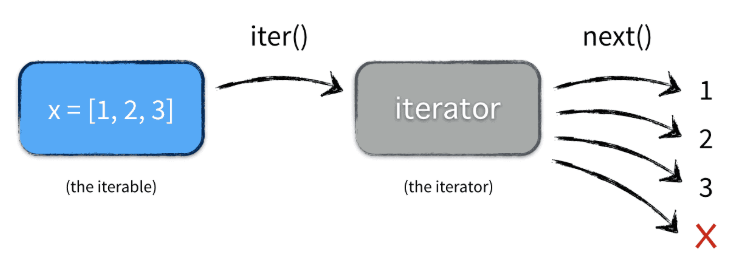

이터레이터에 대한 설명은 여기까지만... 저는 제너레이터를 이야기 하고 싶어요!

# 제너레이터(Generator)

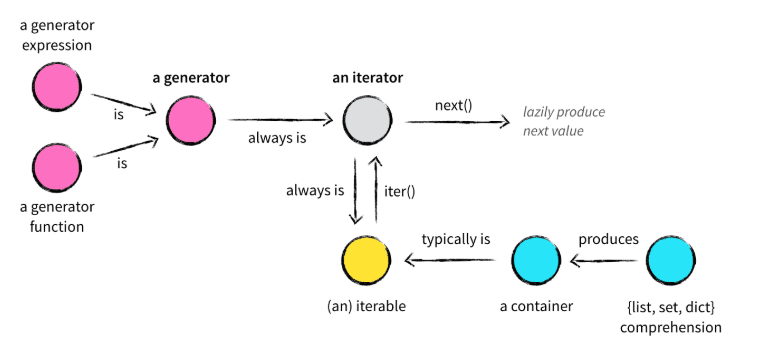

- 모든 제너레이터는 이터레이터이다. (그 반대는 성립하지 않는다.)
- 모든 제너레이터는 게으른 팩토리이다. (즉, 값을 그 때 그 때 생성한다.)

In [65]:
class fib:
    def __init__(self):
        self.prev = 0
        self.curr = 1

    def __iter__(self):
        return self

    def __next__(self):
        value = self.curr
        self.curr += self.prev
        self.prev = value
        return value

In [66]:
f = fib()

In [68]:
from itertools import islice

list(islice(f, 0, 10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

itertools에 있는 모든 메소드는 이터레이터

In [70]:
def fib():
    prev, curr = 0, 1
    while True:
        yield curr
        prev, curr = curr, prev + curr

In [73]:
f = fib()

In [74]:
list(islice(f, 0, 10))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [95]:
numbers = range(6)

In [96]:
[x * x for x in numbers]

[0, 1, 4, 9, 16, 25]

In [97]:
lazy_squares = (x * x for x in numbers)
lazy_squares

<generator object <genexpr> at 0x0000024C5A8AA200>

In [98]:
next(lazy_squares)

0

In [99]:
list(lazy_squares)

[1, 4, 9, 16, 25]

파이썬에서는 왜 이터레이터와 제너레이터를 이렇게 구분해놓을까요?

In [121]:
numbers = range(1000000)

In [122]:
iter_ = [x * x for x in numbers]
gener_ = (x * x for x in numbers)

In [124]:
import sys

In [126]:
print(sys.getsizeof(iter_))
print(sys.getsizeof(gener_))

8697464
88



iterator는 이미 메모리에 전부 올라와 있거나, 모두 메로리로 올려도 부담이 없는 작은 규모의 데이터에 합당   

하지만 큰 데이터를 다루는 경우에는, 성능 및 자원 관리의 측면에 있어서라도 부분적인 접근에 따라 생성 또는 접근하는 것이 효율적이라 generator를 이용하게 된다.

In [127]:
%%time

result = 0
for i in iter_:
    result += i**2
print(result)

199999500000333333333333300000
Wall time: 415 ms


In [128]:
%%time

result = 0
for i in gener_:
    result += i**2
print(result)

199999500000333333333333300000
Wall time: 498 ms


# 재미있는 파이썬 이모저모

#### 1. 왜 함수로 코드를 짜라는거야? 줄코딩이 어때서!

In [89]:
N = 10000000    

In [90]:
%%time

result = 0
for i in range(N+1):
    result += i**2

print(result)

333333383333335000000
Wall time: 3.78 s


In [91]:
def cal(n):
    result = 0
    for i in range(n+1):
        result += i**2
    print(result)

In [92]:
%%time

cal(N)

333333383333335000000
Wall time: 3.3 s


파이썬에서는 같은 코드라도 줄코딩보다 함수형태가 무조건 빠르다.

#### 2. round 제대로 알고 있으신가요?

In [130]:
a = round(0.5)
b = round(1.5)
c = round(2.5)
d = round(3.5)

결과를 맞추신 분에게는 사은품이...